In [2]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn import neighbors
import matplotlib.pyplot as plt 
import numpy as np
import time

In [3]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [4]:
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [5]:
print (mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [7]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [7]:
print (mnist.data.shape)

(70000, 784)


In [8]:
print (mnist.target.shape)

(70000,)


In [9]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
mnist.data[0][1]

0.0

In [11]:
mnist.data[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
mnist.data[:100] 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

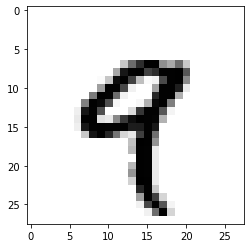

In [41]:
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

La méthode des k-plus proches voisins 

In [24]:
data = np.random.randint(70000, size=5000)
small_dataset = mnist.data[data]
small_targets = mnist.target[data]

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=0.7)

In [10]:
# Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé
clf = neighbors.KNeighborsClassifier (n_neighbors = 10) 
clf.fit(xtrain, ytrain) 
ypredicted = clf.predict(xtest)
clf.predict_proba(xtest) 
clf.score(xtest, ytest)

0.914

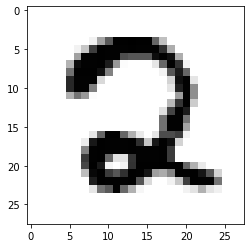

'2'

In [11]:
images_new = xtest.reshape((-1, 28, 28))
plt.imshow(images_new[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 
ypredicted[4]

In [12]:
best_n_neighbors = 0
score_comp = 0
scores = []
kn = []
for k in range(2, 15):
    clf = neighbors.KNeighborsClassifier (n_neighbors = k) 
    clf.fit(xtrain, ytrain) 
    score = clf.score(xtest, ytest)
    scores.append(score)
    kn.append(k)
    if (score > score_comp):
        score_comp = score
        best_n_neighbors = k
    print("score for %d neighbors is: %.3f" % (k, score))
print("\nThe best score of %.3f is attained with %d neighbors" % (score_comp, best_n_neighbors))


score for 2 neighbors is: 0.916
score for 3 neighbors is: 0.925
score for 4 neighbors is: 0.919
score for 5 neighbors is: 0.924
score for 6 neighbors is: 0.926
score for 7 neighbors is: 0.922
score for 8 neighbors is: 0.925
score for 9 neighbors is: 0.922
score for 10 neighbors is: 0.914
score for 11 neighbors is: 0.914
score for 12 neighbors is: 0.911
score for 13 neighbors is: 0.914
score for 14 neighbors is: 0.908

The best score of 0.926 is attained with 6 neighbors


Text(0.5, 1.0, 'Score avec 2 à 15 voisins')

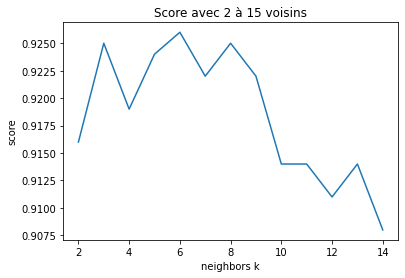

In [13]:
plt.plot(kn, scores)
plt.xlabel('neighbors k')
plt.ylabel('score')
plt.title('Score avec 2 à 15 voisins')

In [14]:
best_n_neighbors = 0
score_comp = 0
kf = model_selection.KFold(n_splits=10,shuffle=True) 
scores = []
kn = []
for k in range(2, 15):
    sum_score = 0
    for train_index, test_index in kf.split(small_dataset):
        xtrain_kfold, xtest_kfold = small_dataset[train_index], small_dataset[test_index]
        ytrain_kfold, ytest_kfold = small_targets[train_index], small_targets[test_index]

        clf = neighbors.KNeighborsClassifier (n_neighbors = k) 
        clf.fit(xtrain_kfold, ytrain_kfold) 
        score = clf.score(xtest_kfold, ytest_kfold)
        sum_score += score
    mean_score = sum_score/10
    scores.append(mean_score)
    kn.append(k)
    if (mean_score > score_comp):
        score_comp = mean_score
        best_n_neighbors = k
    print("mean score for %d neighbors is: %.3f" % (k, mean_score))
print("\nThe best score of %.3f is attained with %d neighbors" % (score_comp, best_n_neighbors))



mean score for 2 neighbors is: 0.926
mean score for 3 neighbors is: 0.936
mean score for 4 neighbors is: 0.932
mean score for 5 neighbors is: 0.934
mean score for 6 neighbors is: 0.933
mean score for 7 neighbors is: 0.933
mean score for 8 neighbors is: 0.930
mean score for 9 neighbors is: 0.927
mean score for 10 neighbors is: 0.925
mean score for 11 neighbors is: 0.923
mean score for 12 neighbors is: 0.923
mean score for 13 neighbors is: 0.921
mean score for 14 neighbors is: 0.918

The best score of 0.936 is attained with 3 neighbors


Text(0.5, 1.0, 'Score avec 10-fold cross validation')

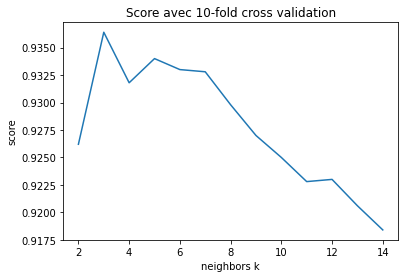

In [15]:
plt.plot(kn, scores)
plt.xlabel('neighbors k')
plt.ylabel('score')
plt.title('Score avec 10-fold cross validation')

In [16]:
# Notes
# 2 folds (50%) is really bad
# All the way up to 5

# Varier la taille 
#data = np.random.randint(70000, size=500)
#small_dataset = mnist.data[data]
#small_targets = mnist.target[data]

#Varier le pourcentage d'echantillon

scores = []
trainsizes = []
for i in range(1, 10):
    best_n_neighbors = 0
    score_comp = 0
    print("i = %d et train_size = %.3f" % (i, i/10))
    trainsizes.append(i/10)
    xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=i/10)
    for k in range(2, 15):
        clf = neighbors.KNeighborsClassifier (n_neighbors = k, metric = 'euclidean', n_jobs = 1) 
        clf.fit(xtrain, ytrain) 
        score = clf.score(xtest, ytest)
        if (score > score_comp):
            score_comp = score
            best_n_neighbors = k
    scores.append(score_comp)
        #print("score for %d neighbors is: %.3f" % (k, score))
    print("\nThe best score of %.3f is attained with %d neighbors\n\n" % (score_comp, best_n_neighbors))

i = 1 et train_size = 0.100

The best score of 0.829 is attained with 3 neighbors


i = 2 et train_size = 0.200

The best score of 0.878 is attained with 5 neighbors


i = 3 et train_size = 0.300

The best score of 0.906 is attained with 3 neighbors


i = 4 et train_size = 0.400

The best score of 0.917 is attained with 3 neighbors


i = 5 et train_size = 0.500

The best score of 0.916 is attained with 4 neighbors


i = 6 et train_size = 0.600

The best score of 0.926 is attained with 5 neighbors


i = 7 et train_size = 0.700

The best score of 0.924 is attained with 6 neighbors


i = 8 et train_size = 0.800

The best score of 0.935 is attained with 5 neighbors


i = 9 et train_size = 0.900

The best score of 0.948 is attained with 9 neighbors




Text(0.5, 1.0, "Score en fonction d'echantillon train")

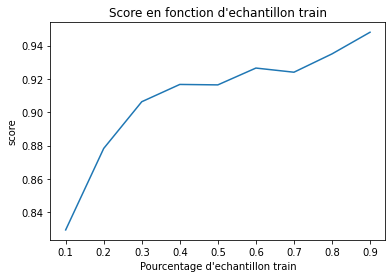

In [17]:
plt.plot(trainsizes, scores)
plt.xlabel('Pourcentage d\'echantillon train')
plt.ylabel('score')
plt.title('Score en fonction d\'echantillon train')



In [118]:
scores = []
echsizes = []
for i in range(1, 10):
    best_n_neighbors = 0
    score_comp = 0
    print("i = %d et train_size = %.3f" % (i, 10000/i))
    echsizes.append(10000/i)
    data = np.random.randint(70000, size=int(10000/i))
    small_dataset = mnist.data[data]
    small_targets = mnist.target[data]
    xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=0.8)
    for k in range(2, 15):
        clf = neighbors.KNeighborsClassifier (n_neighbors = k, metric = 'euclidean', n_jobs = 1) 
        clf.fit(xtrain, ytrain) 
        y_pred = clf.predict(xtest)
        score = clf.score(xtest, ytest)
        score = precision_score(ytest, y_pred, average='macro')
        if (score > score_comp):
            score_comp = score
            best_n_neighbors = k
    scores.append(score_comp)
        #print("score for %d neighbors is: %.3f" % (k, score))
    print("\nThe best score of %.3f is attained with %d neighbors\n\n" % (score_comp, best_n_neighbors))

i = 1 et train_size = 10000.000

The best score of 0.947 is attained with 3 neighbors


i = 2 et train_size = 5000.000

The best score of 0.943 is attained with 5 neighbors


i = 3 et train_size = 3333.333

The best score of 0.931 is attained with 5 neighbors


i = 4 et train_size = 2500.000

The best score of 0.912 is attained with 3 neighbors


i = 5 et train_size = 2000.000

The best score of 0.920 is attained with 5 neighbors


i = 6 et train_size = 1666.667

The best score of 0.908 is attained with 5 neighbors


i = 7 et train_size = 1428.571

The best score of 0.871 is attained with 4 neighbors


i = 8 et train_size = 1250.000

The best score of 0.883 is attained with 10 neighbors


i = 9 et train_size = 1111.111

The best score of 0.912 is attained with 6 neighbors




Text(0.5, 1.0, "Score en fonction de la taille d'echantillon train")

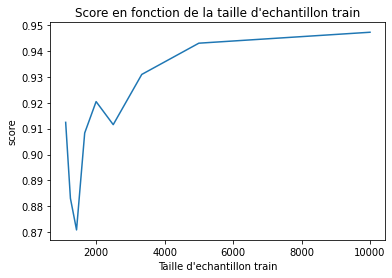

In [119]:
plt.plot(echsizes, scores)
plt.xlabel('Taille d\'echantillon train')
plt.ylabel('score')
plt.title('Score en fonction de la taille d\'echantillon train')

In [120]:
data = np.random.randint(70000, size=5000)
small_dataset = mnist.data[data]
small_targets = mnist.target[data]

In [130]:
scores = []
x = []
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
n = 0
for i in metrics:
    best_n_neighbors = 0
    score_comp = 0
    print("metric = %s" %  i)
    xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=0.8)
    clf = neighbors.KNeighborsClassifier (n_neighbors = 10, metric = i, n_jobs = 1) 
    clf.fit(xtrain, ytrain) 
    y_pred = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    score = precision_score(ytest, y_pred, average='macro')
    scores.append(score)
    n+=1
    x.append(n)
        #print("score for %d neighbors is: %.3f" % (k, score))
    print("\nThe best score of %.3f is attained with %d neighbors\n\n" % (score, 10))

metric = euclidean

The best score of 0.917 is attained with 10 neighbors


metric = manhattan

The best score of 0.923 is attained with 10 neighbors


metric = chebyshev

The best score of 0.627 is attained with 10 neighbors


metric = minkowski

The best score of 0.907 is attained with 10 neighbors




Text(0.5, 1.0, 'Score en fonction de la metric')

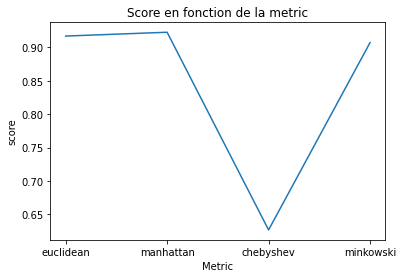

In [132]:
plt.xticks(x, metrics)
plt.plot(x, scores)
plt.ylabel('score')
plt.xlabel('Metric')
plt.title('Score en fonction de la metric')

In [144]:
iterations = 30

totalscore = 0
mean = 0
for i in range(0,iterations):
    start = time.time()
    xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=0.8)
    clf = neighbors.KNeighborsClassifier (n_neighbors = 10, metric = 'euclidean', n_jobs = 1) 
    clf.fit(xtrain, ytrain) 
    y_pred = clf.predict(xtest)
    end = time.time()
    mean += end-start
print('with n_jobs = 1: mean execution time %.4f' % (mean/iterations))

totalscore = 0
mean = 0
for i in range(0,iterations):
    start = time.time()
    xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=0.8)
    clf = neighbors.KNeighborsClassifier (n_neighbors = 10, metric = 'euclidean', n_jobs = -1) 
    clf.fit(xtrain, ytrain) 
    y_pred = clf.predict(xtest)
    end = time.time()
    mean += end-start
print('with n_jobs = -1: mean execution time %.4f' % (mean/iterations))

with n_jobs = 1: mean execution time 0.1494
with n_jobs = -1: mean execution time 0.1998


In [33]:
tp1 = time.time()
clf = neighbors.KNeighborsClassifier (n_neighbors = 3) 
clf.fit(xtrain, ytrain) 
tp2 = time.time()
ypredicted = clf.predict(xtest)
clf.predict_proba(xtest) 
print(clf.score(xtest, ytest))


0.9226666666666666

In [35]:
metrics.zero_one_loss(ytest, ypredicted)

0.07733333333333337

In [34]:
tp2-tp1

0.009464025497436523

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[164,   0,   0,   1,   0,   0,   1,   0,   0,   0],
       [  0, 157,   0,   0,   0,   0,   0,   1,   0,   0],
       [  5,  12, 128,   0,   2,   1,   1,   3,   0,   2],
       [  0,   2,   0, 169,   0,   4,   0,   1,   1,   1],
       [  0,   4,   0,   0, 124,   0,   0,   2,   0,  10],
       [  2,   2,   0,   4,   1, 119,   0,   1,   0,   4],
       [  0,   1,   0,   0,   0,   0, 145,   0,   0,   0],
       [  1,   3,   1,   0,   2,   0,   0, 133,   0,   2],
       [  0,   8,   1,   4,   1,   7,   0,   1, 109,   4],
       [  0,   1,   1,   3,   3,   1,   0,   3,   0, 136]])

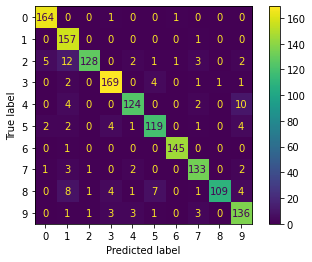

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(ytest, ypredicted)
metrics.plot_confusion_matrix(clf, xtest, ytest)
cm

In [29]:
metrics.precision_score(ytest, ypredicted ,average='macro')

0.9274341974241563

In [31]:
clf.score(xtest, ytest)

0.9226666666666666